# import libraries

In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load sonar data

In [3]:
df = pd.read_csv('sonar.csv')
df.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


# shuffle data

In [4]:
sonar_df = df.iloc[np.random.permutation(len(df))]
sonar_df.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
120,0.0162,0.0041,0.0239,0.0441,0.0630,0.0921,0.1368,0.1078,0.1552,0.1779,...,0.0173,0.0135,0.0114,0.0062,0.0157,0.0088,0.0036,0.0053,0.0030,M
160,0.0305,0.0363,0.0214,0.0227,0.0456,0.0665,0.0939,0.0972,0.2535,0.3127,...,0.0200,0.0070,0.0070,0.0086,0.0089,0.0074,0.0042,0.0055,0.0021,M
155,0.0047,0.0059,0.0080,0.0554,0.0883,0.1278,0.1674,0.1373,0.2922,0.3469,...,0.0095,0.0126,0.0069,0.0039,0.0068,0.0060,0.0045,0.0002,0.0029,M
8,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
60,0.0135,0.0045,0.0051,0.0289,0.0561,0.0929,0.1031,0.0883,0.1596,0.1908,...,0.0037,0.0084,0.0102,0.0096,0.0024,0.0037,0.0028,0.0030,0.0030,R


# Prepare data 

In [124]:
# x_trains = sonar_df[].astype('float')
# y = sonar_df.iloc[:,-1]

# df_test=sonar_df.iloc[:148,:60].astype('float')
# y_df_test = sonar_df.iloc[:148, 60]

x_train= sonar_df.iloc[:148,:60].astype('float')
y_train= sonar_df.iloc[:148,60]


x_test= sonar_df.iloc[148:190,:60].astype('float')
y_test= sonar_df.iloc[148:190,60]


x_val= sonar_df.iloc[190:,:60].astype('float')
y_val= sonar_df.iloc[190:,60]


# x_train ,x_tests ,y_train ,y_tests = train_test_split(X,Y,test_size=.2,random_state=0)

# partial_x_train ,x_vals ,partial_y_train ,y_vals = train_test_split(x_train,y_train,test_size=.1,random_state=0)


# df_train_label = partial_y_train.iloc[:148, 60]
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)


print(x_val.shape)
print(y_val.shape)





(148, 60)
(148,)
(42, 60)
(42,)
(17, 60)
(17,)


In [125]:
encoder = LabelEncoder()
# encoded_Y  = encoder.fit_transform(partial_y_train)
# Y = pd.get_dummies(y1).values


# one_hot_trrain_labels = to_categorical(df_train_label)
# print(one_hot_trrain_labels.shape)

encoded_Y = encoder.fit_transform(y_train)
encoded_y_train = keras.utils.to_categorical(encoded_Y)
encoded_Y = encoder.fit_transform(y_test)
encoded_y_test = keras.utils.to_categorical(encoded_Y)
encoded_Y = encoder.fit_transform(y_val)
encoded_y_val = keras.utils.to_categorical(encoded_Y)

# x= 144*0.1
# print(x)
# # x_train[:1000]
# x_val = x_train[:14,:-1]
# y_val= y_train[:14,:-1]
# x_trains =x_train[130:]
# y_trains =y_train[130:]


# Alternate method to one hot encode
# enc =LabelEncoder()
# sonar_df.iloc[:,60] = enc.fit_transform(sonar_df.iloc[:,60])

# df_train=sonar_df.iloc[:144,:60]
# df_train_label = sonar_df.iloc[:144, 60]
# train_data = df_train.to_numpy()
# train_labels = df_train_label.to_numpy()
# one_hot_trrain_labels = to_categorical(train_labels)
# print(one_hot_trrain_labels.shape)
# print(train_data.shape)
# #a =pd.Series(np.nan,[1,2,3,4,5,6,7,8,9,10])
# a1=pd.Series(np.nan, index=[49,48,47,46,45, 1, 2, 3, 4, 5])
# a1.loc[:3]

y_val

112    M
197    M
85     R
111    M
29     R
41     R
195    M
27     R
188    M
185    M
151    M
138    M
190    M
59     R
98     M
30     R
34     R
Name: R, dtype: object

In [130]:
model = Sequential()
model.add(Dense(64,input_shape=(60,),activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(2,activation ='softmax'))

In [131]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [132]:
history =model.fit(x_train,encoded_y_train,epochs=55,batch_size=512,validation_data=(x_val,encoded_y_val))

Train on 148 samples, validate on 17 samples
Epoch 1/55
148/148 [==============================] - 0s 2ms/step - loss: 0.7383 - accuracy: 0.4932 - val_loss: 0.7515 - val_accuracy: 0.4118
Epoch 2/55
148/148 [==============================] - 0s 54us/step - loss: 0.7128 - accuracy: 0.4932 - val_loss: 0.7237 - val_accuracy: 0.3529
Epoch 3/55
148/148 [==============================] - 0s 54us/step - loss: 0.6947 - accuracy: 0.4932 - val_loss: 0.7025 - val_accuracy: 0.4118
Epoch 4/55
148/148 [==============================] - 0s 68us/step - loss: 0.6832 - accuracy: 0.5811 - val_loss: 0.6879 - val_accuracy: 0.6471
Epoch 5/55
148/148 [==============================] - 0s 54us/step - loss: 0.6759 - accuracy: 0.5878 - val_loss: 0.6761 - val_accuracy: 0.5882
Epoch 6/55
148/148 [==============================] - 0s 74us/step - loss: 0.6698 - accuracy: 0.6081 - val_loss: 0.6671 - val_accuracy: 0.7647
Epoch 7/55
148/148 [==============================] - 0s 47us/step - loss: 0.6647 - accuracy: 0.66

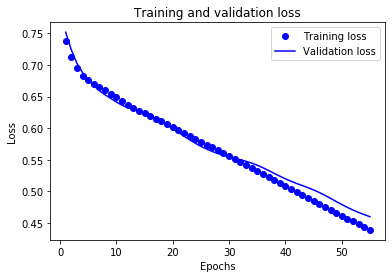

In [133]:
import matplotlib.pyplot as plt
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()


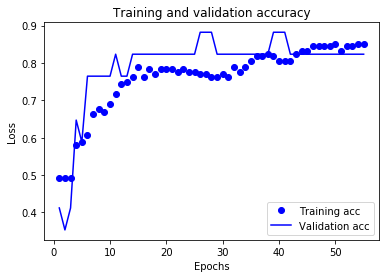

In [134]:








plt.clf()
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()


In [ ]:
model.fit(x_train,encoded_y_train, epochs=50)

In [135]:
test_loss,test_acc = model.evaluate(x_test,encoded_y_test,verbose=2)
print(test_loss,test_acc)

0.5187915989330837 0.6666666865348816
